In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)

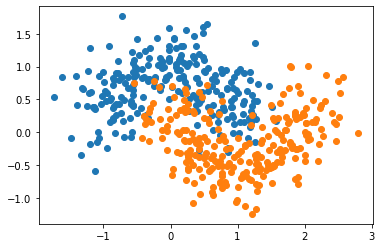

In [3]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 使用逻辑回归

In [5]:
from  sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
log_clf.score(X_test, y_test)

0.864

# 使用svm

In [6]:
from sklearn.svm import SVC

svc_clf = SVC()
svc_clf.fit(X_train, y_train)
svc_clf.score(X_test, y_test)

0.896

# 使用决策树

In [7]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.832

In [8]:
y_predict1 = log_clf.predict(X_test)
y_predict2 = svc_clf.predict(X_test)
y_predict3 = dt_clf.predict(X_test)

In [9]:
y_predict = np.array((y_predict1 + y_predict2 + y_predict3) >=2, dtype="int")
y_predict

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [10]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.904

# 使用Voting Classifier

### 使用 Hard Voting Classifier

In [11]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('log_clf', LogisticRegression()), 
        ('svm_clf', SVC()),
        ('dt_clf', DecisionTreeClassifier(random_state=666))
    ],
    voting='hard')

voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.904

# 使用 Soft Voting Classifier

In [12]:
voting_clf2 = VotingClassifier(
    estimators=[
        ('log_clf', LogisticRegression()), 
        ('svm_clf', SVC(probability=True)),
        ('dt_clf', DecisionTreeClassifier(random_state=666))
    ],
    voting='hard')

voting_clf2.fit(X_train, y_train)
voting_clf2.score(X_test, y_test)

0.904

# Bagging 和 Pasting

### 使用 Bagging

In [13]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True)
bagging_clf.fit(X_train, y_train)
bagging_clf.score(X_test, y_test)

0.912

In [14]:
bagging_clf2 = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5000, max_samples=100, bootstrap=True)
bagging_clf2.fit(X_train, y_train)
bagging_clf2.score(X_test, y_test)

0.912

### oob

In [17]:
%%time
bagging_clf3 = BaggingClassifier(
    DecisionTreeClassifier(), 
    n_estimators=500, 
    max_samples=100, 
    bootstrap=True,
    oob_score=True)

bagging_clf3.fit(X, y)
bagging_clf3.oob_score_

Wall time: 740 ms


0.918

### n_jobs

In [18]:
%%time
bagging_clf4 = BaggingClassifier(
    DecisionTreeClassifier(), 
    n_estimators=500, 
    max_samples=100, 
    bootstrap=True,
    oob_score=True,
    n_jobs=-1)

bagging_clf4.fit(X, y)
bagging_clf4.oob_score_

Wall time: 281 ms


0.918

### bootstrap_features

In [21]:
%%time
bagging_clf5 = BaggingClassifier(
    DecisionTreeClassifier(), 
    n_estimators=500, 
    max_samples=500, 
    max_features=1,
    bootstrap=True,
    bootstrap_features=True,
    oob_score=True,
    n_jobs=-1)

bagging_clf5.fit(X, y)
bagging_clf5.oob_score_

Wall time: 294 ms


0.832

In [22]:
%%time
bagging_clf6 = BaggingClassifier(
    DecisionTreeClassifier(), 
    n_estimators=500, 
    max_samples=100, 
    max_features=1,
    bootstrap=True,
    bootstrap_features=True,
    oob_score=True,
    n_jobs=-1)

bagging_clf6.fit(X, y)
bagging_clf6.oob_score_

Wall time: 316 ms


0.85

# 随机森林

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=666,
    oob_score=True,
    n_jobs=-1)

rf_clf.fit(X, y)
rf_clf.oob_score_

0.89

In [28]:
rf_clf2 = RandomForestClassifier(
    n_estimators=100,
    max_leaf_nodes=16,
    random_state=666,
    oob_score=True,
    n_jobs=-1)

rf_clf2.fit(X, y)
rf_clf2.oob_score_

0.916

### Extra-Trees

In [29]:
from sklearn.ensemble import ExtraTreesClassifier

et_clf = ExtraTreesClassifier(
    n_estimators=500,
    bootstrap=True,
    oob_score=True,
    random_state=666)
et_clf.fit(X, y)
et_clf.oob_score_

0.892

In [30]:
et_clf2 = ExtraTreesClassifier(
    n_estimators=500,
    bootstrap=True,
    max_leaf_nodes=16,
    oob_score=True,
    random_state=666)
et_clf2.fit(X, y)
et_clf2.oob_score_

0.91

### 集成学习解决回归问题

In [31]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

### AdaBoosting

In [32]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=500)

ada_clf.fit(X_train, y_train)
ada_clf.score(X_test, y_test)

0.864

### Gradient Boosting

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(max_depth=2, n_estimators=30)
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)

0.912